<a href="https://colab.research.google.com/github/AkiraNom/data-analysis-notebook/blob/main/Customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Segmentation Analysis

Cusotmer data was download from the kaggle: [kaggle_dataset](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python)

The dataset contains the basic customer infomation:**ID**, **age**, **gender**, **annual income**, and **spending score** assigned by the mall based on customer behavior and spending nature



This notebook includes:
  1. customr segmentation analysis using unsupervised learning, k-Means clutering algorithm
  2. discussion an effective market strategy based on the cluster.  

In [40]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

In [41]:
df = pd.read_csv('./sample_data/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [42]:
df.shape

(200, 5)

# pre-processling data

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [44]:
# check duplication of customer ID which has to be unique
print('CustomerID_duplicated:{}'.format(df.duplicated("CustomerID").any()))

CustomerID_duplicated:False


In [45]:
# view data statistics
display(df.describe())
display(df.describe(exclude='number'))

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


,Gender
count,200
unique,2
top,Female
freq,112


In [46]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

# Visualize the data distribution

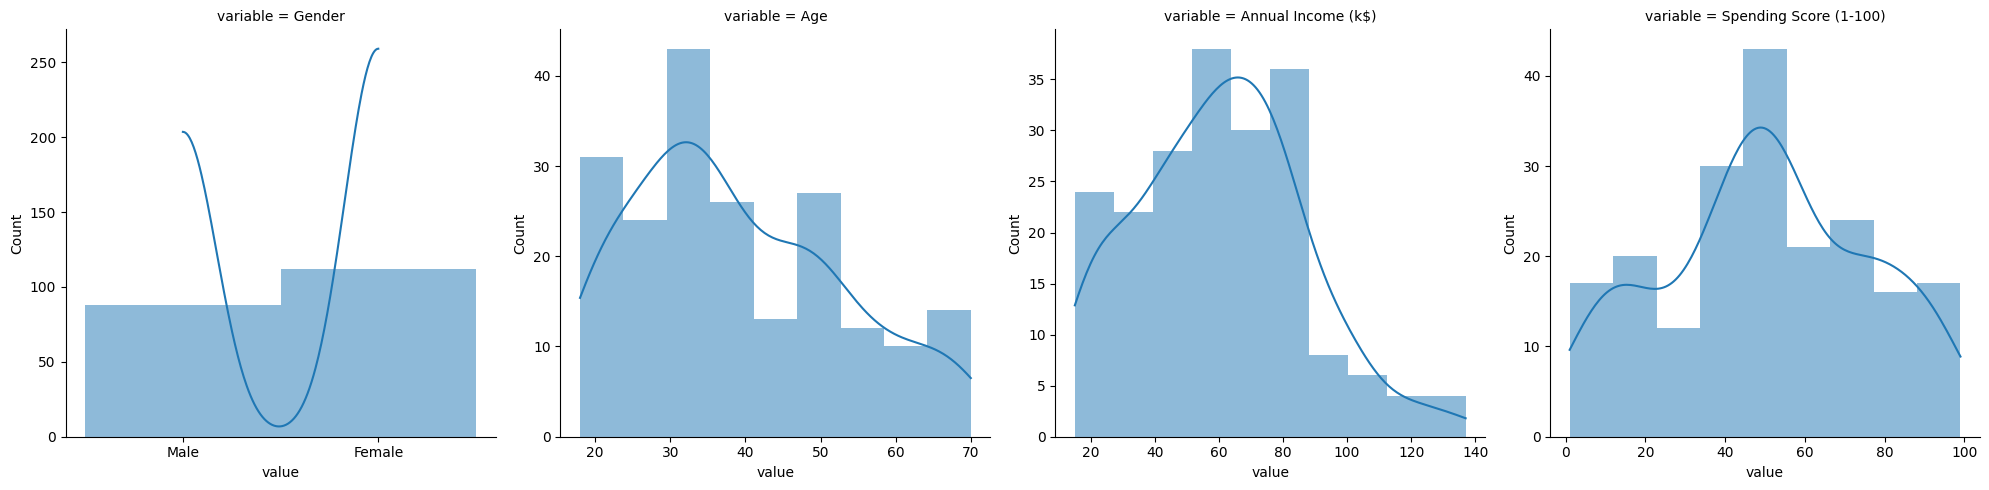

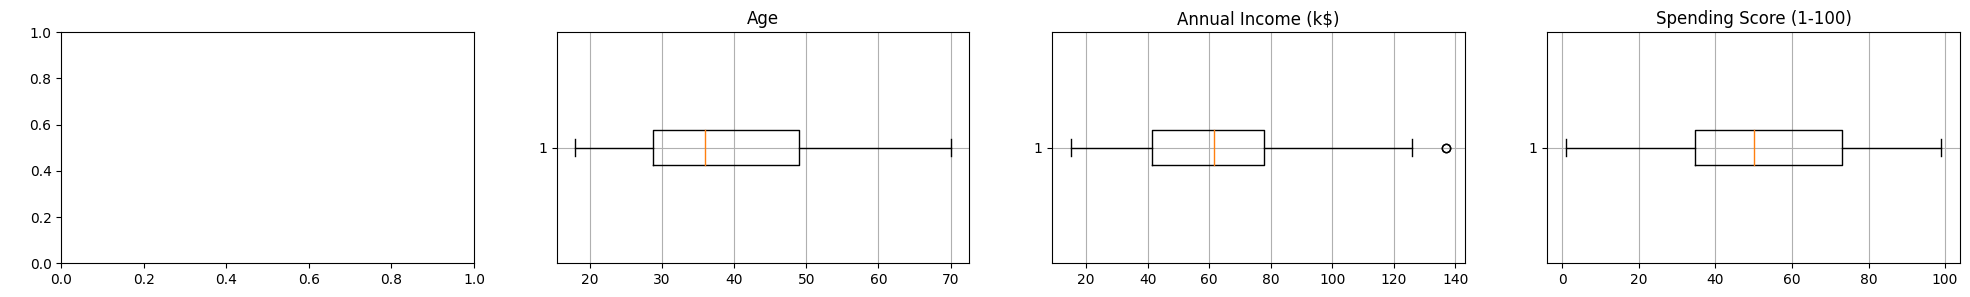

In [47]:
#remove the customerID and reshape the data structure
df_melt = df.drop(["CustomerID"], axis=1).melt()
#print(df_melt)

#draw histogram and KDE
fig = sns.FacetGrid(df_melt, col="variable", height=5, sharex=False, sharey=False)
fig.map(sns.histplot, "value", linestyle="None", alpha=0.5, kde=True)

#get col names for the graph title
Age = df.columns.values[2]
Income = df.columns.values[3]
Score = df.columns.values[4]

#draw box plot
fig = plt.figure(figsize=(24.5,3))
ax1 = fig.add_subplot(1, 4, 1) # empty, but to vertically align the two plots
ax2 = fig.add_subplot(1, 4, 2)
ax3 = fig.add_subplot(1, 4, 3)
ax4 = fig.add_subplot(1, 4, 4)

ax2.set_title(Age)
ax3.set_title(Income)
ax4.set_title(Score)

ax1.set_ylabel(" ")

ax2.boxplot(df[Age], vert=False)
ax3.boxplot(df[Income], vert=False)
ax4.boxplot(df[Score], vert=False)

ax2.grid()
ax3.grid()
ax4.grid()

In [48]:
# convert categorical data to numeric data (integer encoding)
df=df.replace(({'Male':0, 'Female':1}))
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


<Axes: >

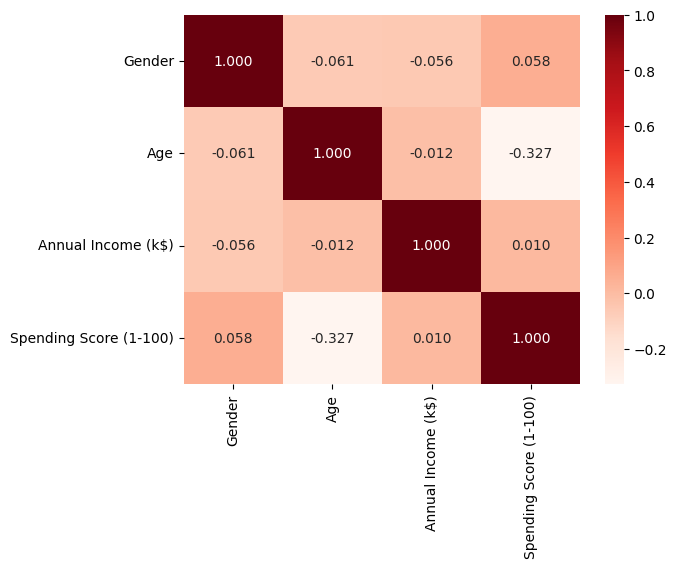

In [49]:
#inspect correlation coefficient
sns.heatmap(df.drop(["CustomerID"], axis=1).corr(), annot=True, fmt=".3f", cmap="Reds")

# K-means clustering (non-hierarchical clustering)

## Clustering with 2 features (Age, and Annual income)

<ipython-input-50-c4772841e3ef>:22: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax2.scatter(X[y_km == n, 0], X[y_km == n, 1], s=100, c=cm.tab10(n), marker="*", label="cluster"+str(n+1))


Text(0, 0.5, 'Annual Income (k$)')

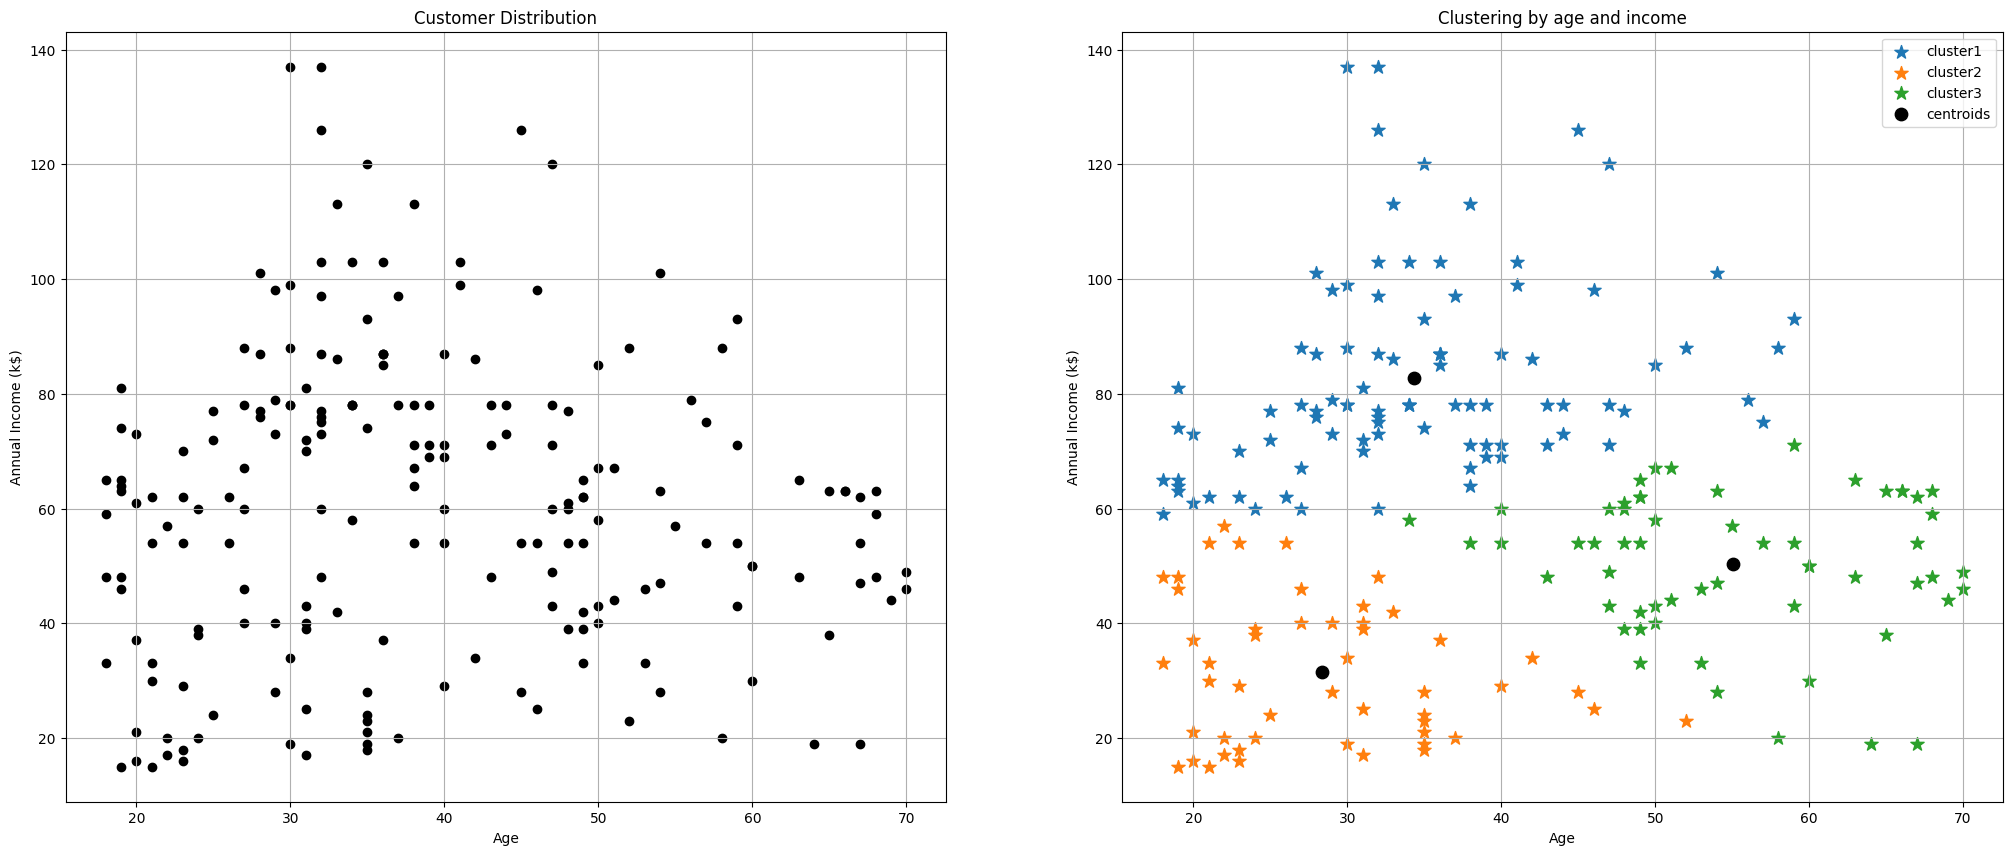

In [50]:
# clutering base on 2 features (age and annual income)
X = df.loc[:,[Age,Income]].values


# create a model with n_clusters=3
# n_clusters will be tweeked later using sum of squared erros of prediction (SSE)
km = KMeans(n_clusters=3, n_init='auto', random_state=0)

# assign the cluster number to each sample
y_km = km.fit_predict(X)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))

ax1.set_title("Customer Distribution")
ax1.scatter(X[:, 0], X[:, 1], c="black")
ax1.grid()
ax1.set_xlabel(Age)
ax1.set_ylabel(Income)

ax2.set_title("Clustering by age and income")
for n in range(3):
    ax2.scatter(X[y_km == n, 0], X[y_km == n, 1], s=100, c=cm.tab10(n), marker="*", label="cluster"+str(n+1))

#display a centroid of each cluster
ax2.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=80, marker="o", c="black", label="centroids")
ax2.legend()
ax2.grid()
ax2.set_xlabel(Age)
ax2.set_ylabel(Income)

In [51]:
# sample counts in each cluster
y = pd.DataFrame(km.predict(X))
for a, b in enumerate(y.value_counts().sort_index()):
   print("cluster{}:{}".format(a+1,b))

cluster1:92
cluster2:50
cluster3:58


In [52]:
# help(km)

sklern.cluster.KMeans has
> attributes: <br>
> inertia_: float <br>
> Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.
  
It is described as following:
\begin{gather*}
\sum\limits_{i=1}^n\min_{\mu_j \in C}(||x_i-\mu_{j}||^2)
\end{gather*}

The k-Means algorithm clusters data with n_clusters so that inertial or within-cluster sum-of-suares will be minimized. More details [here](https://scikit-learn.org/stable/modules/clustering.html)

Comapring inertia, you could determine a value of the n_clusters.

Elbow plot is a way to visualize the correlation between SSE and number of clusters (k).

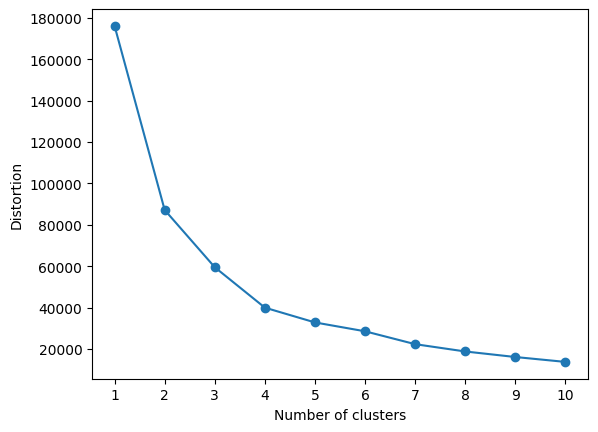

In [53]:
# Elbow plot is one way to visualize SSE and k.

distortions = []

for i in range(1, 11):
    km = KMeans(n_clusters=i, n_init='auto', random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

# Elbow plot
plt.plot(range(1, 11), distortions, marker="o")
plt.xticks(np.arange(1, 11, 1))
plt.xlabel("Number of clusters")
plt.ylabel("Distortion")
plt.show()

Until k=4, SSE is greatly reduced. Compare how clustering will change when k=4 comared with k=3   

<ipython-input-54-c6d52d6ca1d9>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax1.scatter(X[y_km == n, 0], X[y_km == n, 1], s=100, c=cm.tab10(n), marker="*", label="cluster"+str(n+1))
<ipython-input-54-c6d52d6ca1d9>:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax2.scatter(X[y_km == n, 0], X[y_km == n, 1], s=100, c=cm.tab10(n), marker="*", label="cluster"+str(n+1))


Text(0.5, 1.0, 'cluster = 4')

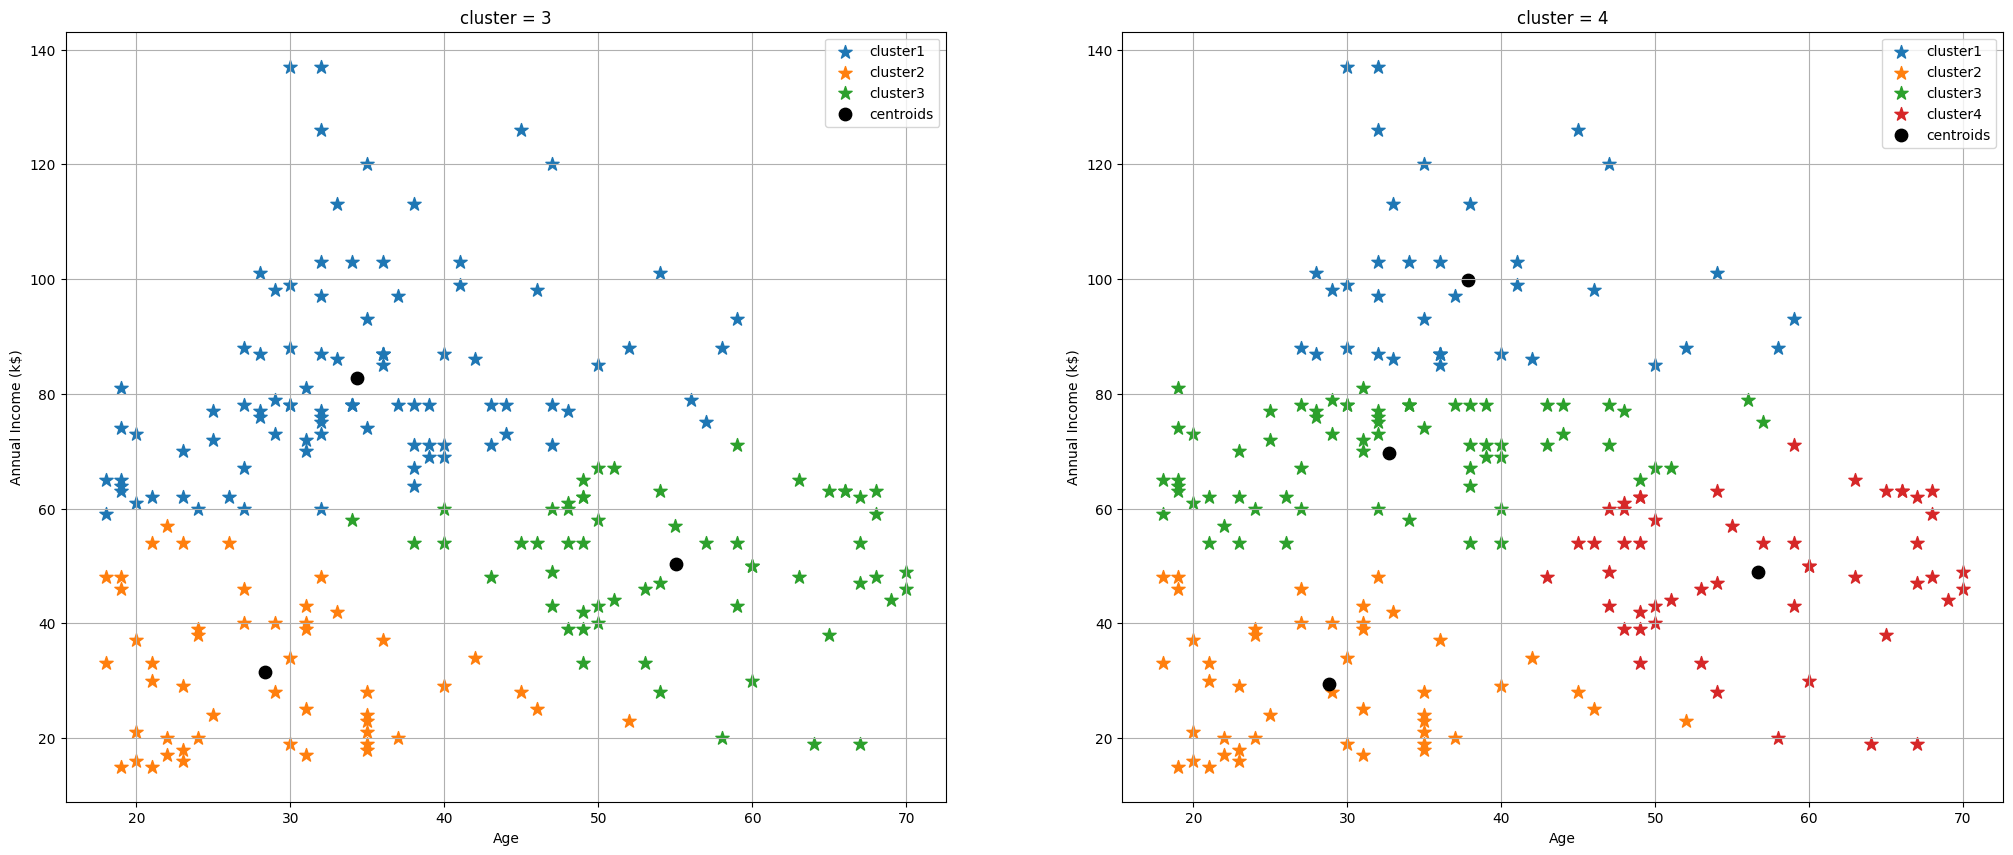

In [54]:
# comapring the graphs of n_clusters=3 and n_clusters=4

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))

# model with n_clusters=3
km = KMeans(n_clusters=3, n_init='auto', random_state=0)
y_km = km.fit_predict(X)

for n in range(3):
    ax1.scatter(X[y_km == n, 0], X[y_km == n, 1], s=100, c=cm.tab10(n), marker="*", label="cluster"+str(n+1))

#plot a centroid
ax1.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=80, marker="o", c="black", label="centroids")
ax1.legend()
ax1.grid()
ax1.set_xlabel(Age)
ax1.set_ylabel(Income)
ax1.set_title("cluster = 3")

# model with n_clusters = 4
km = KMeans(n_clusters=4, n_init='auto', random_state=0)
y_km = km.fit_predict(X)

for n in range(4):
    ax2.scatter(X[y_km == n, 0], X[y_km == n, 1], s=100, c=cm.tab10(n), marker="*", label="cluster"+str(n+1))

#plot a centroid
ax2.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=80, marker="o", c="black", label="centroids")
ax2.legend()
ax2.grid()
ax2.set_xlabel(Age)
ax2.set_ylabel(Income)
ax2.set_title("cluster = 4")

Cluter 3 on the left graph (green stars) is further divided into 2 clusters (cluster 1 and cluster 4) on the right graph.

In [55]:
print("add a cluster id")
# inspect a table
df_clusterd = df.loc[:,["CustomerID", Age,Income, Score]]
df_clusterd["cluster_id"] = y_km+1
df_clusterd

add a cluster id


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),cluster_id
0,1,19,15,39,2
1,2,21,15,81,2
2,3,20,16,6,2
3,4,23,16,77,2
4,5,31,17,40,2
...,...,...,...,...,...
195,196,35,120,79,1
196,197,45,126,28,1
197,198,32,126,74,1
198,199,32,137,18,1


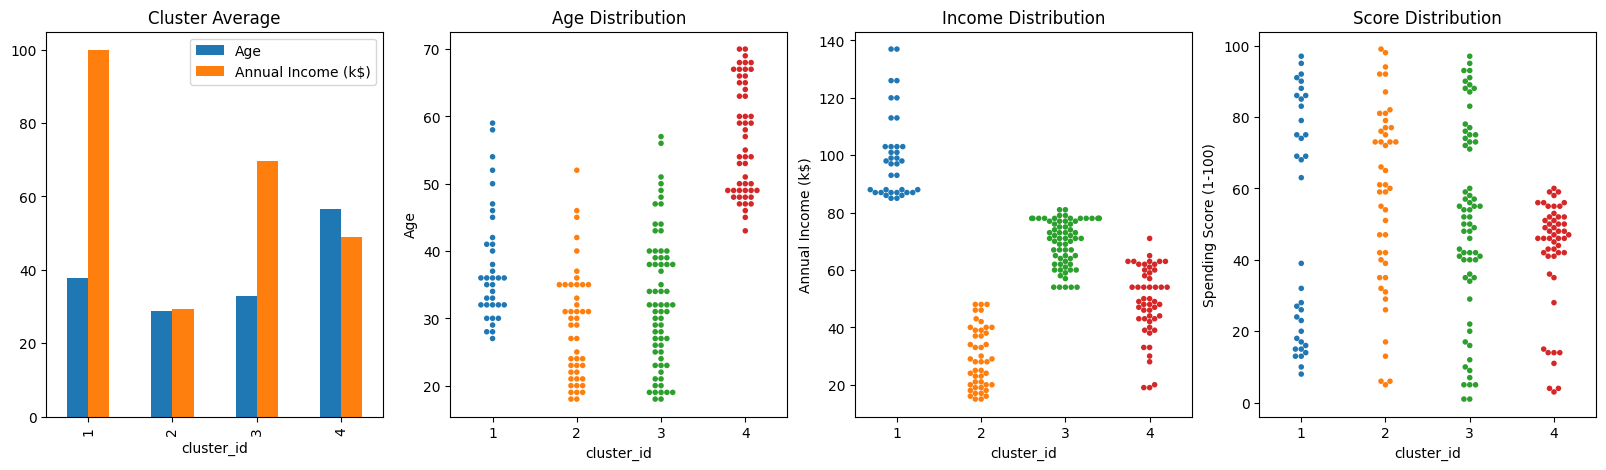

In [56]:
fig, ax = plt.subplots(nrows=1, ncols=4,figsize=(20,5))

result = df_clusterd.groupby("cluster_id").mean().reset_index()
result.plot(x="cluster_id", y=[Age, Income], kind="bar", ax=ax[0])
ax[0].set_title("Cluster Average");

# swarmplot for age distribution by cluster id
sns.swarmplot(data=df_clusterd, x='cluster_id', y=Age, hue='cluster_id',palette='tab10', size=4, legend=False, ax=ax[1])

ax[1].set_title('Age Distribution');
# swarmplot for income distriubtion by cluster id
sns.swarmplot(data=df_clusterd, x='cluster_id', y=Income, hue='cluster_id',palette='tab10', size=4, legend=False, ax=ax[2])
ax[2].set_title('Income Distribution');
# warmplto for shopping score distribution by cluster id
sns.swarmplot(data=df_clusterd, x='cluster_id', y=Score, hue='cluster_id',palette='tab10', size=4, legend=False, ax=ax[3])
ax[3].set_title('Score Distribution');


## Clustering with annual income and shopping score

SSE (Distortion) and No. of clusters (k)


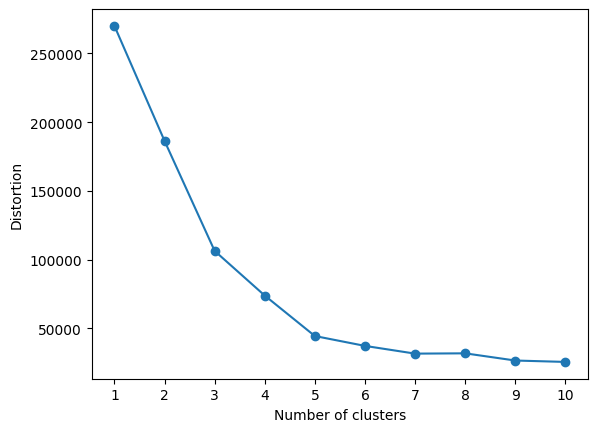

In [57]:
#clustering with annula income and shopping score
X = df.loc[:,[Income, Score]].values

# evaluate n_clusters with an elbow plot
distortions = []

for i in range(1, 11):
    km = KMeans(n_clusters=i, n_init='auto', random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

# Elbow plot
print("SSE (Distortion) and No. of clusters (k)")
plt.plot(range(1, 11), distortions, marker="o")
plt.xticks(np.arange(1, 11, 1))
plt.xlabel("Number of clusters")
plt.ylabel("Distortion")
plt.show()

<ipython-input-58-828df3a5395a>:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax2.scatter(X[y_km == n, 0], X[y_km == n, 1], s=100, c=cm.tab10(n), marker="*", label="cluster"+str(n+1))


Text(0, 0.5, 'Spending Score (1-100)')

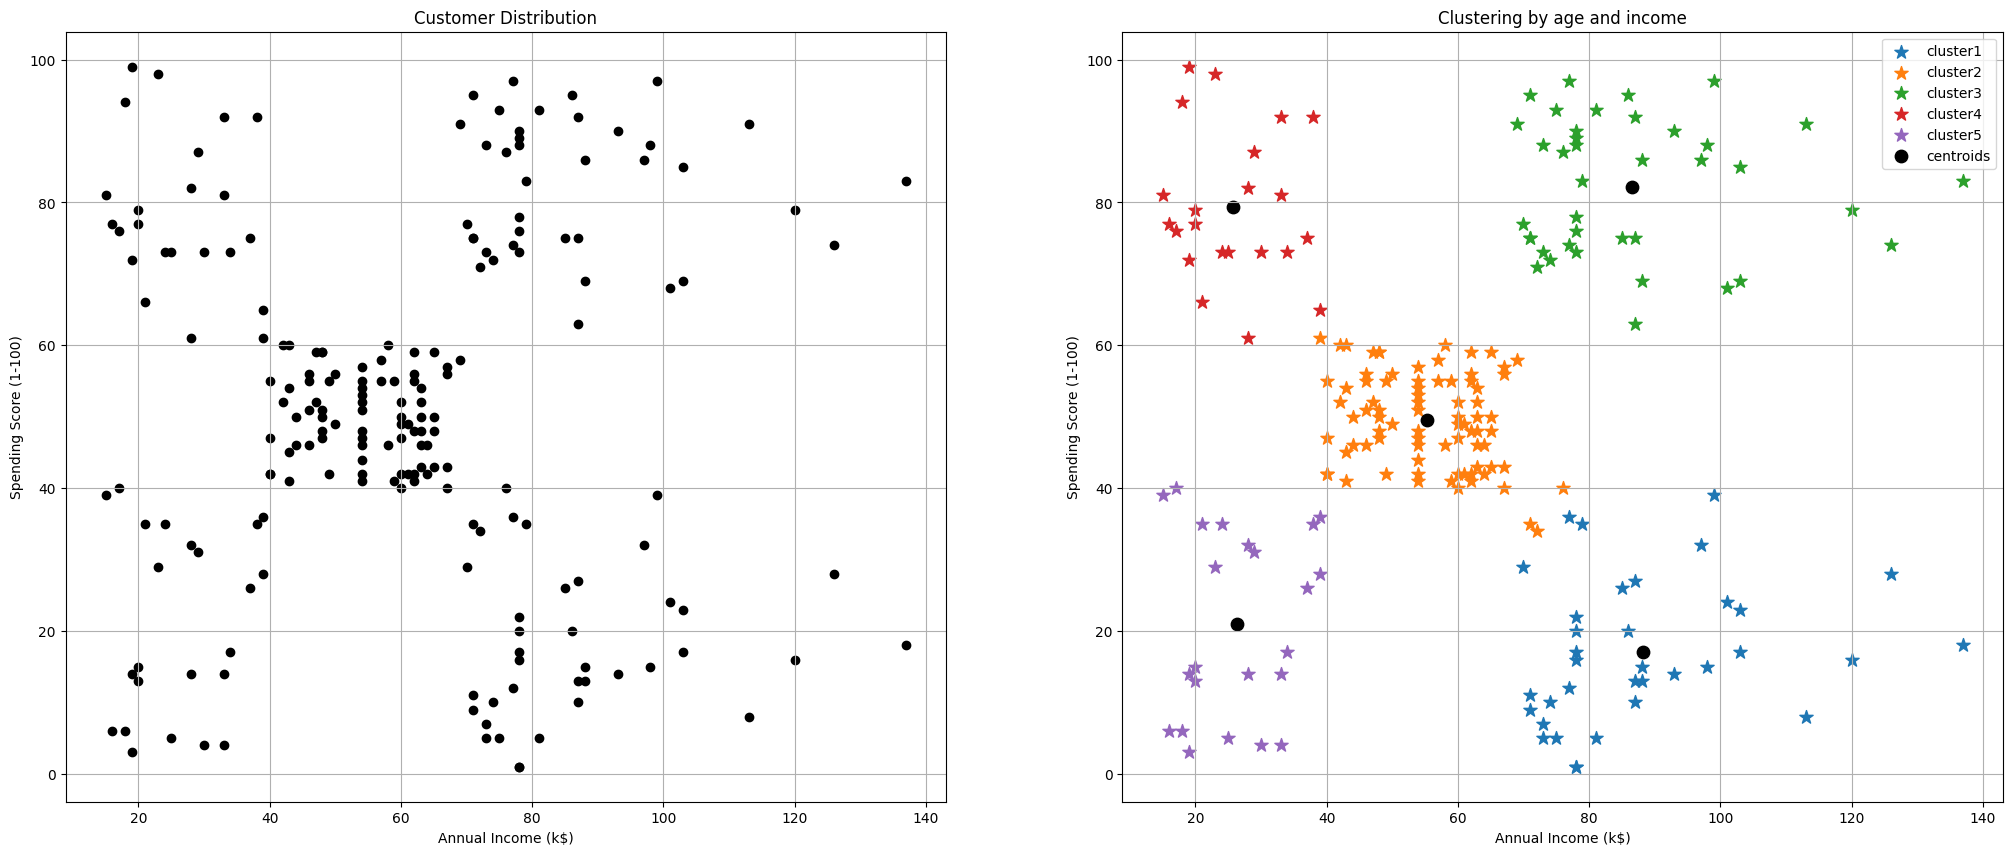

In [58]:
# build a model with n_clusters = 5
km = KMeans(n_clusters=5, n_init='auto', random_state=0)
y_km = km.fit_predict(X)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))

# scatter plot
ax1.set_title("Customer Distribution")
ax1.scatter(X[:, 0], X[:, 1], c="black")
ax1.grid()
ax1.set_xlabel(Income)
ax1.set_ylabel(Score)

# scatter plot masked by cluster id
ax2.set_title("Clustering by age and income")
for n in range(5):
    ax2.scatter(X[y_km == n, 0], X[y_km == n, 1], s=100, c=cm.tab10(n), marker="*", label="cluster"+str(n+1))

#set a centroid
ax2.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=80, marker="o", c="black", label="centroids")
ax2.legend()
ax2.grid()
ax2.set_xlabel(Income)
ax2.set_ylabel(Score)

In [59]:
# counts in each cluster
y = pd.DataFrame(km.predict(X))
for a, b in enumerate(y.value_counts().sort_index()):
   print("cluster{}:{}".format(a+1,b))

cluster1:35
cluster2:81
cluster3:39
cluster4:22
cluster5:23


**Interpretation of graph:**<br>
><font color='blue'>cluster 1 blue (35)</font>: high income but low score  
 <font color='orange'>cluster 2 oragne (81)</font>: middle income and middle shopping score    
<font color='green'>cluster 3 green (39)</font>: high income and high score  
<font color='red'>cluster 4 red (22)</font>: low income but high score  
<font color='purple'>cluster 5 purple (23)</font>: low income and low score  

Based on the resut, priority may be given to cluster 3 -> 4 -> 2 -> 1 -> 5

# Hierarchial Clustering (dendrogram)

The advantage of hierachial clustering (dendrogram) is **visual clarity**. A dendrogram can clearly demonstrate hierarchical clustering relationships and complex structures

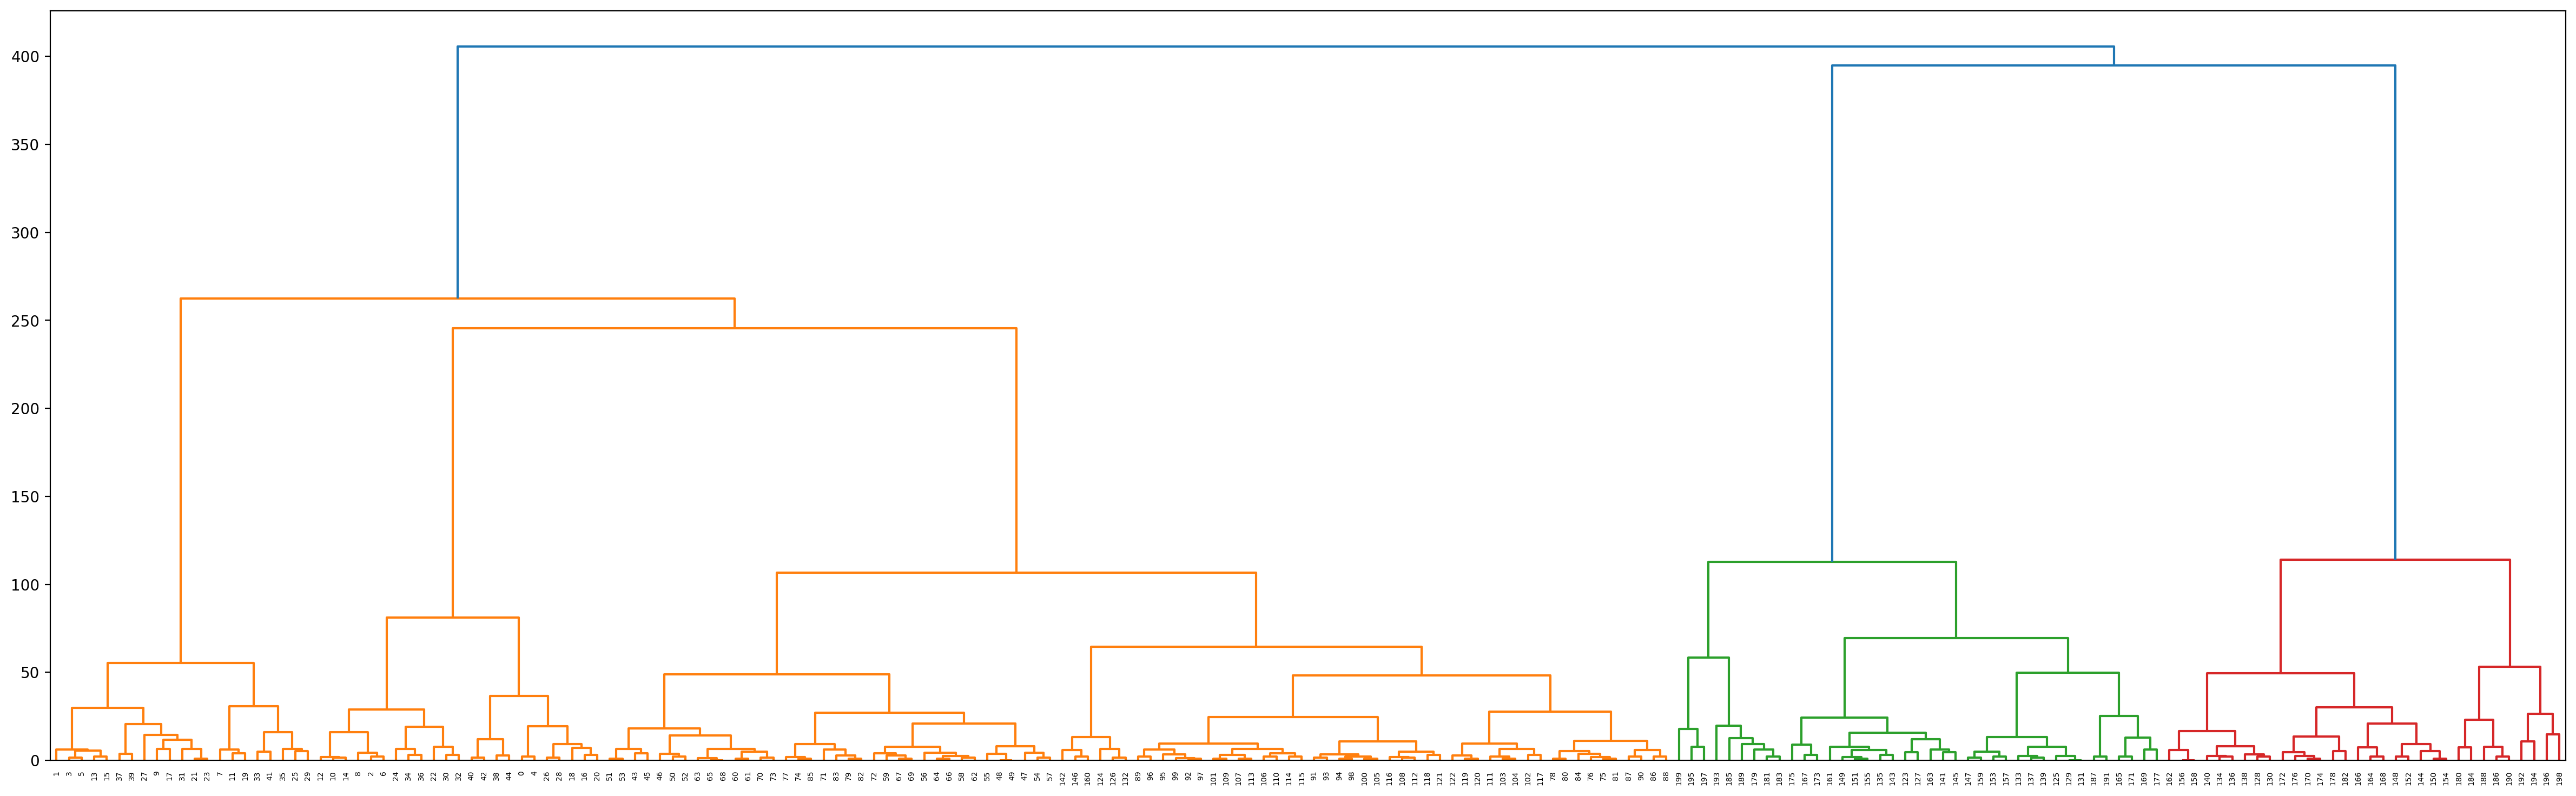

In [60]:
from scipy.cluster.hierarchy import dendrogram, linkage
df_link = df.loc[:,[Income, Score]]

linkage_result = linkage(df_link, method="ward", metric="euclidean")
fig = plt.figure(num=None, figsize=(30, 9), dpi=200, facecolor='w', edgecolor='k')
dendrogram(linkage_result, labels=df_link.index)
plt.xticks(rotation=90)
plt.show()

#save fig
# fig.savefig("dendrogram.png")

Now you need to think how many clusters you will find. ie. where do you place a horizontal line to split custermers?

<ipython-input-61-9e6221ea43ab>:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax1.scatter(df_link[df_link["l_score"] == n][Income], df_link[df_link["l_score"] == n][Score], s=100, c=cm.tab20(n*2), marker="*", label="cluster"+str(n+1))
<ipython-input-61-9e6221ea43ab>:21: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax2.scatter(X[y_km == n, 0], X[y_km == n, 1], s=100, c=cm.tab10(n), marker="*", label="cluster"+str(n+1));


Text(0, 0.5, 'Spending Score (1-100)')

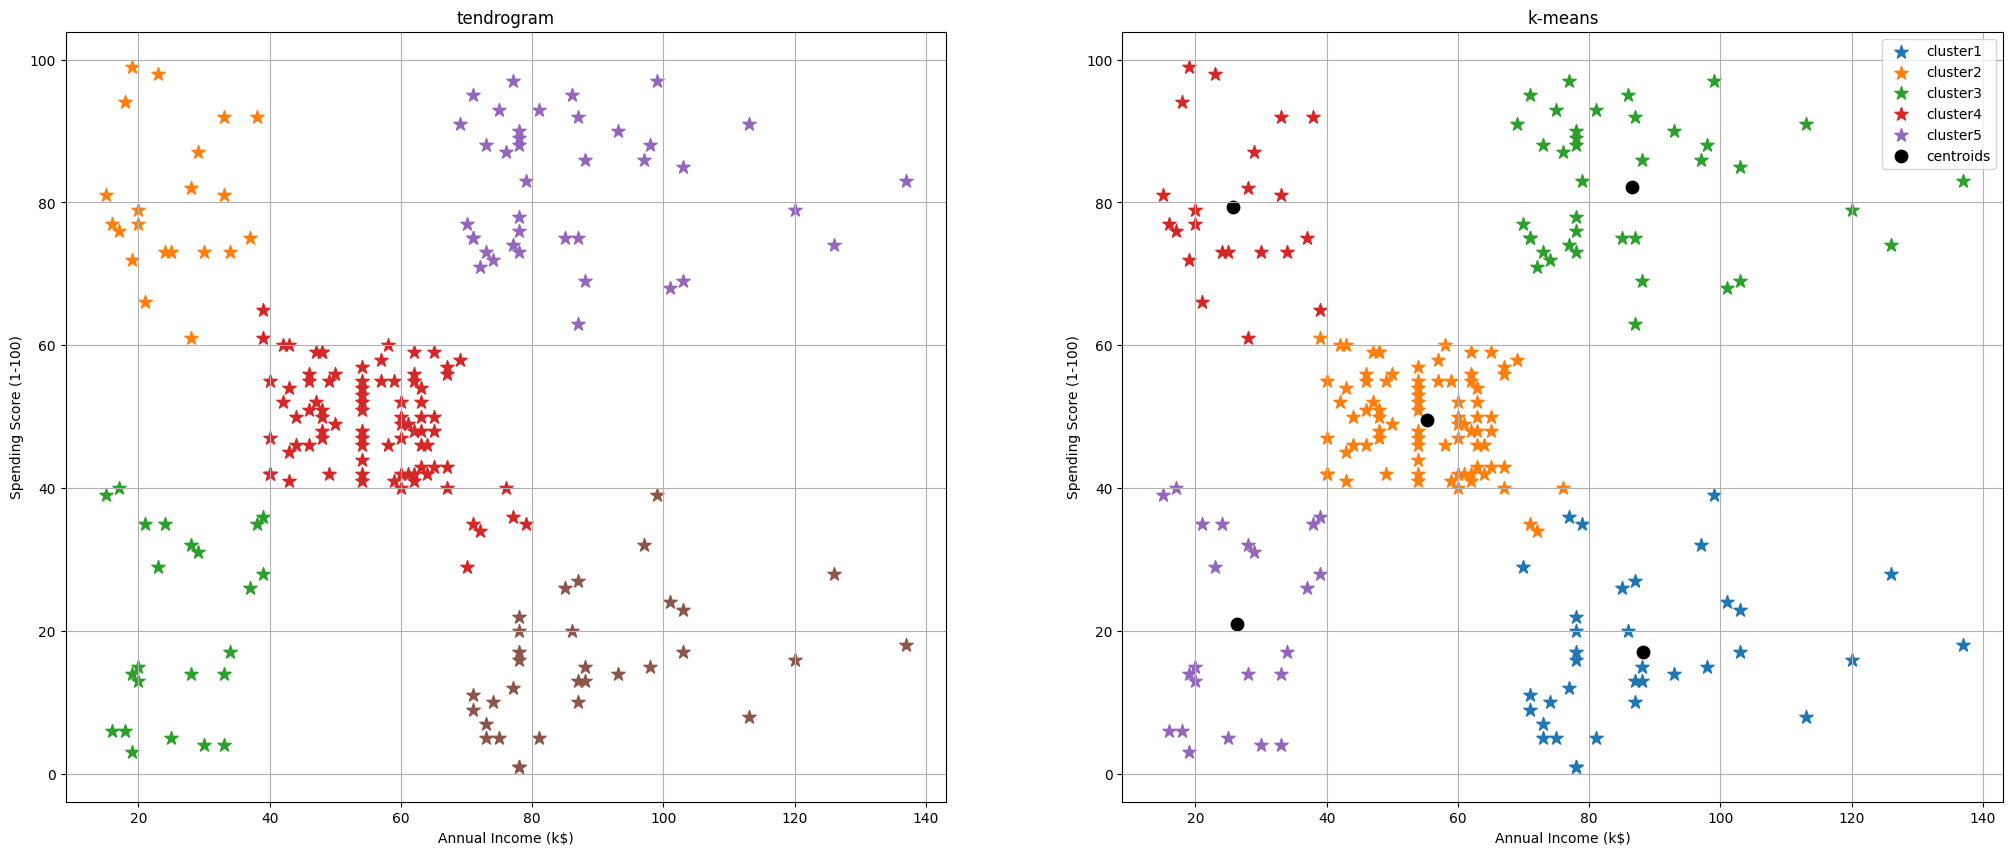

In [61]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
linkage_result
t = 0.5*max(linkage_result[:,2])
c = fcluster(linkage_result, t, criterion="distance")

df_link["l_score"] = c

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(25, 10))

# plot clusters with dendrogram
ax1.set_title("tendrogram")
for n in range(6):
    ax1.scatter(df_link[df_link["l_score"] == n][Income], df_link[df_link["l_score"] == n][Score], s=100, c=cm.tab20(n*2), marker="*", label="cluster"+str(n+1))
ax1.grid()
ax1.set_xlabel(Income)
ax1.set_ylabel(Score)

# plot clusters with k-means
ax2.set_title("k-means")
for n in range(5):
    ax2.scatter(X[y_km == n, 0], X[y_km == n, 1], s=100, c=cm.tab10(n), marker="*", label="cluster"+str(n+1));

#set a controid
ax2.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=80, marker="o", c="black", label="centroids")
ax2.legend()
ax2.grid()
ax2.set_xlabel(Income)
ax2.set_ylabel(Score)

When choosing the same cluster counts, you will find both graphs similar.

# k-Means Clustering with 3 features

When using more features, you may have to apply dimensional reduction techniques, sucha as PCA or LDA, to reduce dimensionality prior to modeling. K-means clustering does not work well with high dimentional data.

This problem is known as **[curse of dimensionality](https://www.mygreatlearning.com/blog/understanding-curse-of-dimensionality/)**.

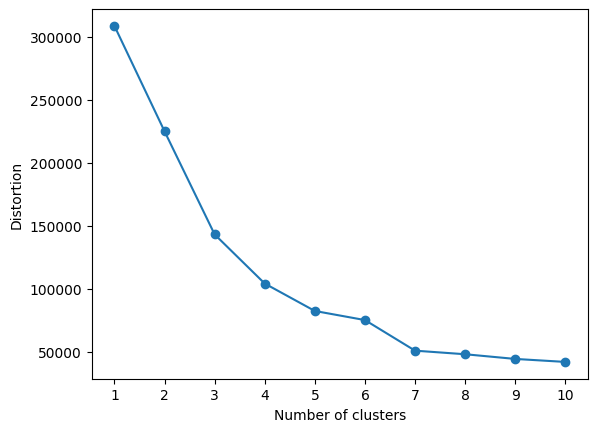

In [62]:
#clutering with age, income and score
X = df.loc[:,[Age, Income, Score]].values

# evaluate n_clusters with an elbow plto
distortions = []

for i in range(1, 11):
    km = KMeans(n_clusters=i, n_init='auto', random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1, 11), distortions, marker="o")
plt.xticks(np.arange(1, 11, 1))
plt.xlabel("Number of clusters")
plt.ylabel("Distortion")
plt.show()

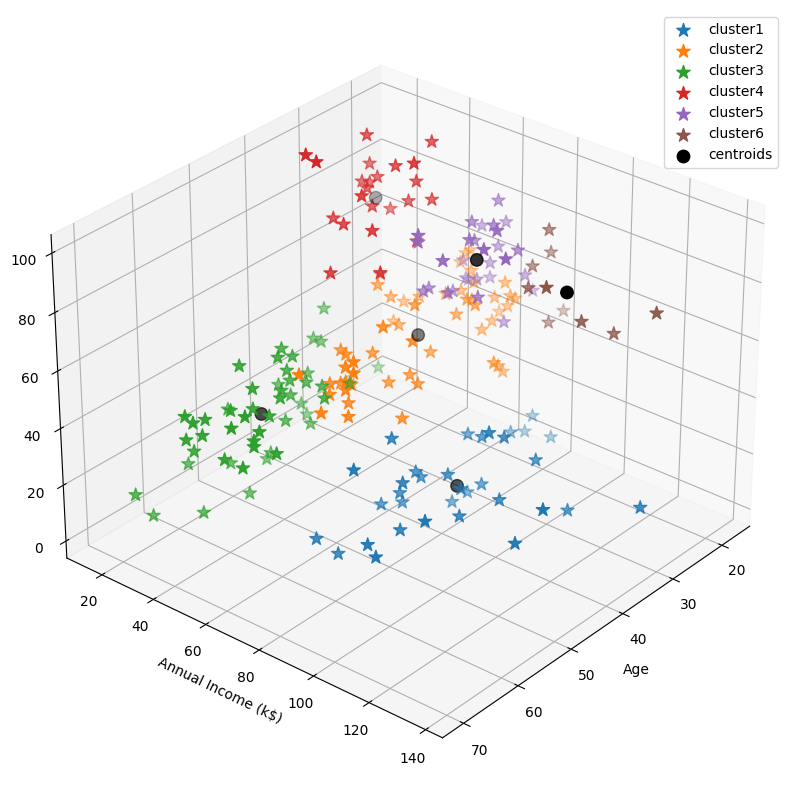

In [63]:
# build a model with n_clusters =6
km = KMeans(n_clusters=6, n_init='auto', random_state=0)
y_km = km.fit_predict(X)

# create a fig object
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1,1,1, projection="3d")


# draw a 3D scatter plot
for n in range(6):
    ax.scatter3D(X[y_km == n, 0], X[y_km == n, 1], X[y_km == n, 2], s=100, marker="*", label="cluster"+str(n+1))
ax.scatter3D(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], km.cluster_centers_[:, 2], s=80, marker="o", c="black", label="centroids")
ax.legend()
plt.xlabel(Age)
plt.ylabel(Income)
# rotate a graph
ax.view_init(elev=30, azim=40) #elev:vetical、azim:horizonal

In [64]:
print("add a cluster id")
# inspect a table
df_3d_clusterd = df.loc[:,["CustomerID", Age,Income, Score]]
df_3d_clusterd["cluster_id"] = y_km+1
df_3d_clusterd

add a cluster id


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),cluster_id
0,1,19,15,39,4
1,2,21,15,81,4
2,3,20,16,6,3
3,4,23,16,77,4
4,5,31,17,40,3
...,...,...,...,...,...
195,196,35,120,79,6
196,197,45,126,28,1
197,198,32,126,74,6
198,199,32,137,18,1


In [65]:
# display(df_3d_clusterd.cluster_id.value_counts())

# counts in each cluster
y = pd.DataFrame(km.predict(X))
for a, b in enumerate(y.value_counts().sort_index()):
   print("cluster{}:{}".format(a+1,b))

cluster1:34
cluster2:53
cluster3:50
cluster4:24
cluster5:29
cluster6:10


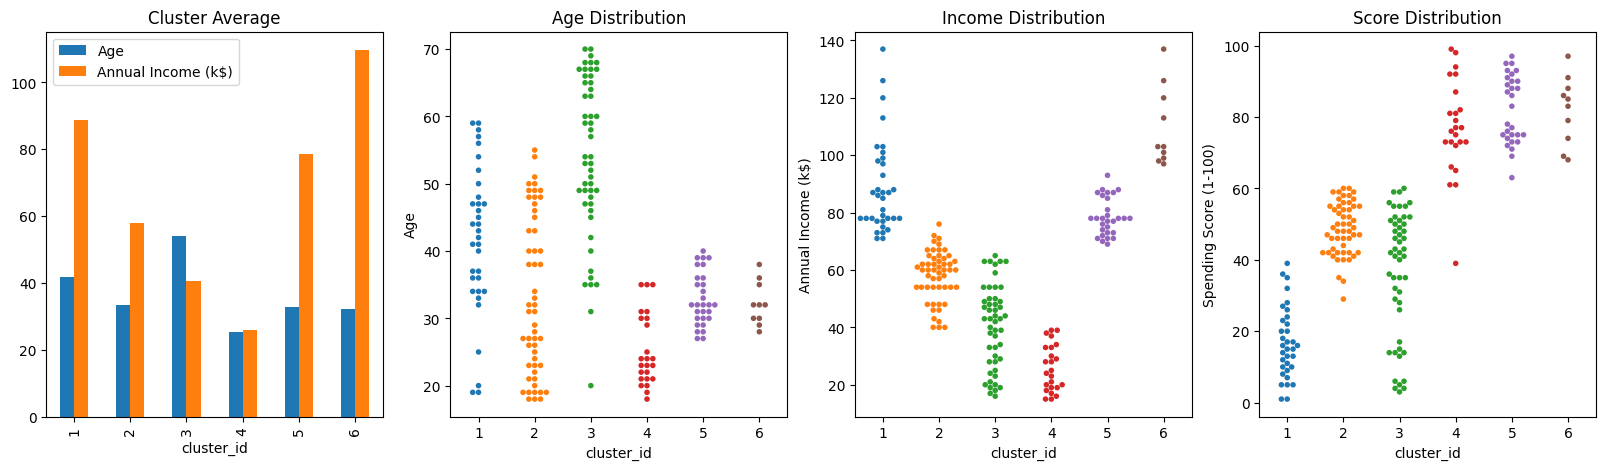

In [66]:
# visualize data distribution in each cluster
fig, ax = plt.subplots(nrows=1, ncols=4,figsize=(20,5))

result = df_3d_clusterd.groupby("cluster_id").mean().reset_index()
result.plot(x="cluster_id", y=[Age, Income], kind="bar", ax=ax[0])
ax[0].set_title("Cluster Average");

# swarmplot for age distribution by cluster id
sns.swarmplot(data=df_3d_clusterd, x='cluster_id', y=Age, hue='cluster_id',palette='tab10', size=4, legend=False, ax=ax[1])

ax[1].set_title('Age Distribution');
# swarmplot for income distriubtion by cluster id
sns.swarmplot(data=df_3d_clusterd, x='cluster_id', y=Income, hue='cluster_id',palette='tab10', size=4, legend=False, ax=ax[2])
ax[2].set_title('Income Distribution');
# warmplto for shopping score distribution by cluster id
sns.swarmplot(data=df_3d_clusterd, x='cluster_id', y=Score, hue='cluster_id',palette='tab10', size=4, legend=False, ax=ax[3])
ax[3].set_title('Score Distribution');


## Silhouette coefficient

The other method to selece the number of clusters. Sihouette analysis can be used to study the separation distance between the resulting clusters.

**Silhouette coefficient:**
* It can range from -1 to +1
* A value close to +1 indicates the samples is far away from the neighboring clusters.
* A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters.
* A negative value indicates that those samples might have been assigned to the wrong cluster.

From the thicknee of the silhouette plot, the size of clusters can be visualized.

See more details in [scikit-learn](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)



For n_clusters = 3 The average silhouette_score is : 0.32206100860903886
For n_clusters = 4 The average silhouette_score is : 0.40546302077733304
For n_clusters = 5 The average silhouette_score is : 0.44045315045641703
For n_clusters = 6 The average silhouette_score is : 0.4523443947724053
For n_clusters = 7 The average silhouette_score is : 0.44322227727251884
For n_clusters = 8 The average silhouette_score is : 0.4279139556958886


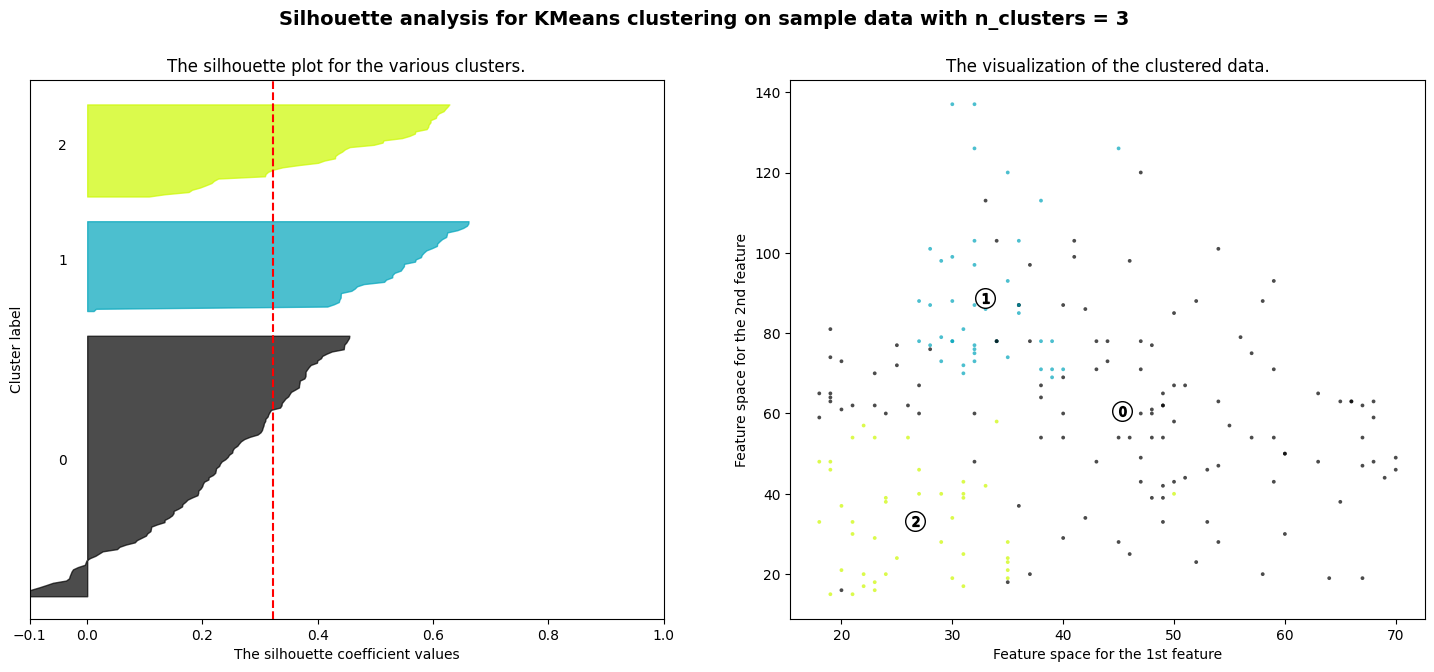

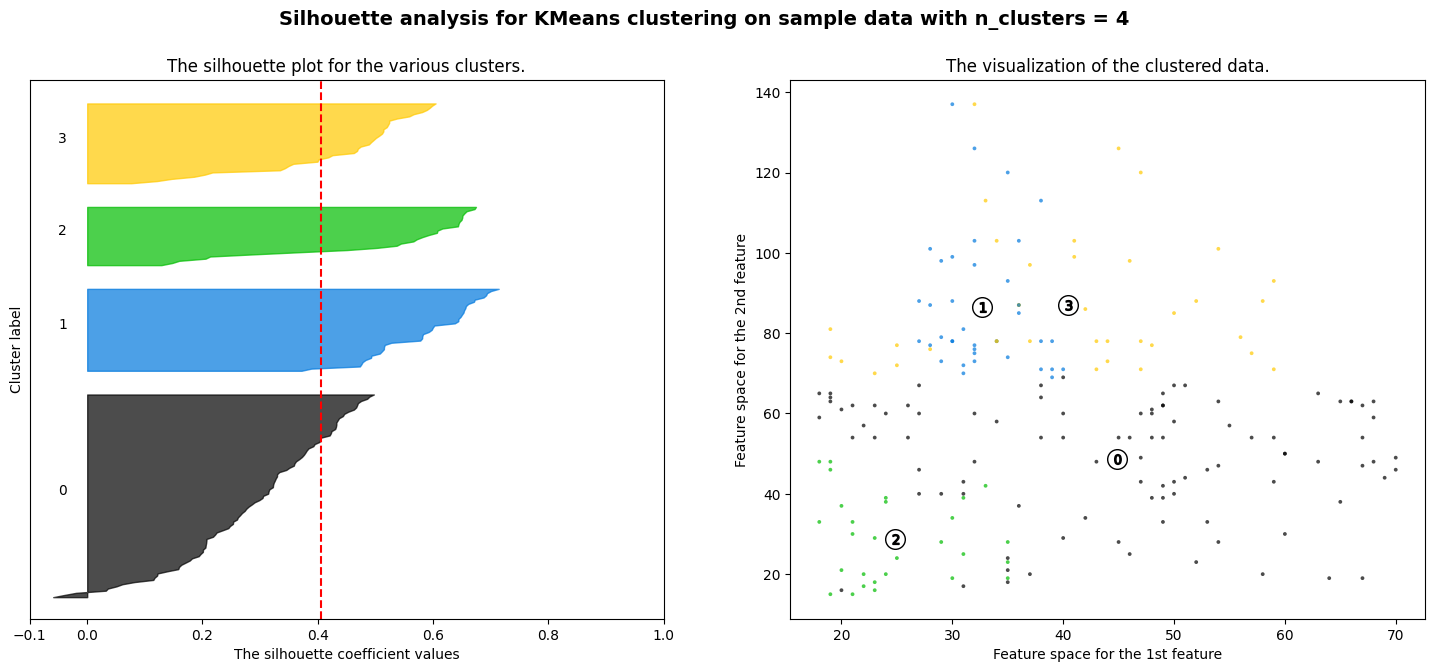

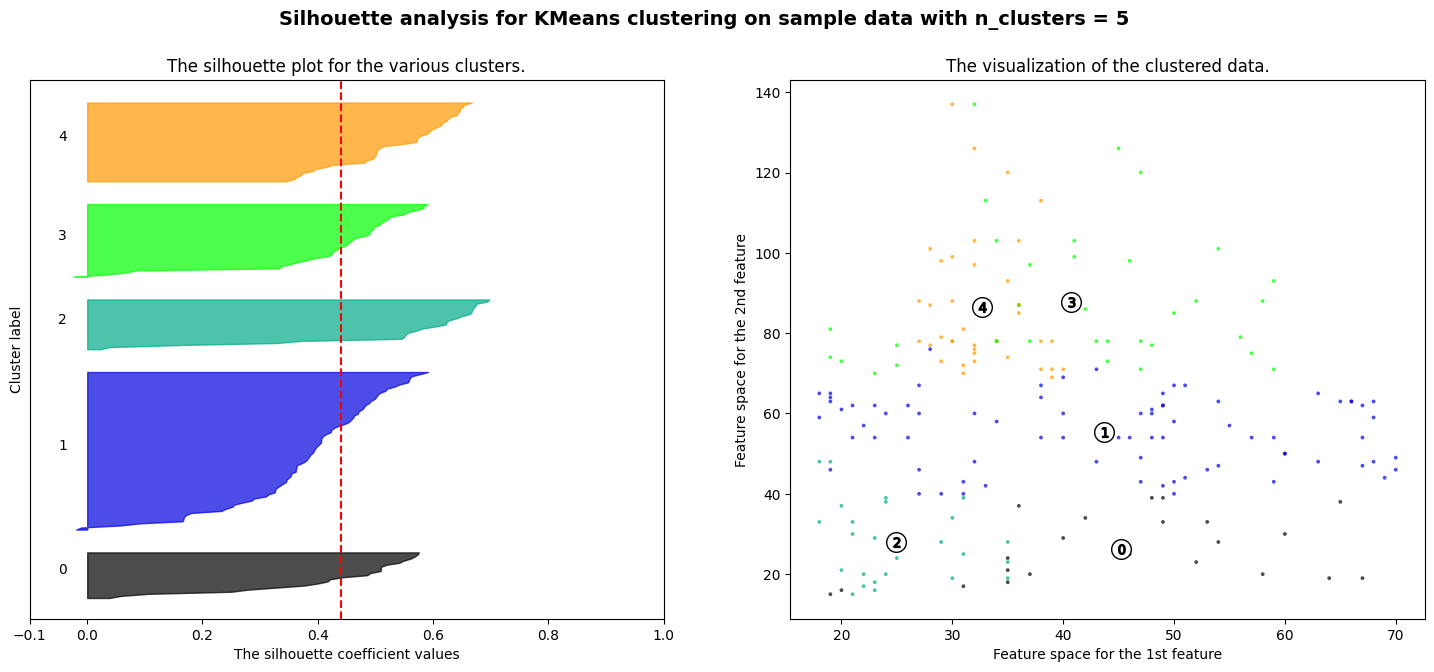

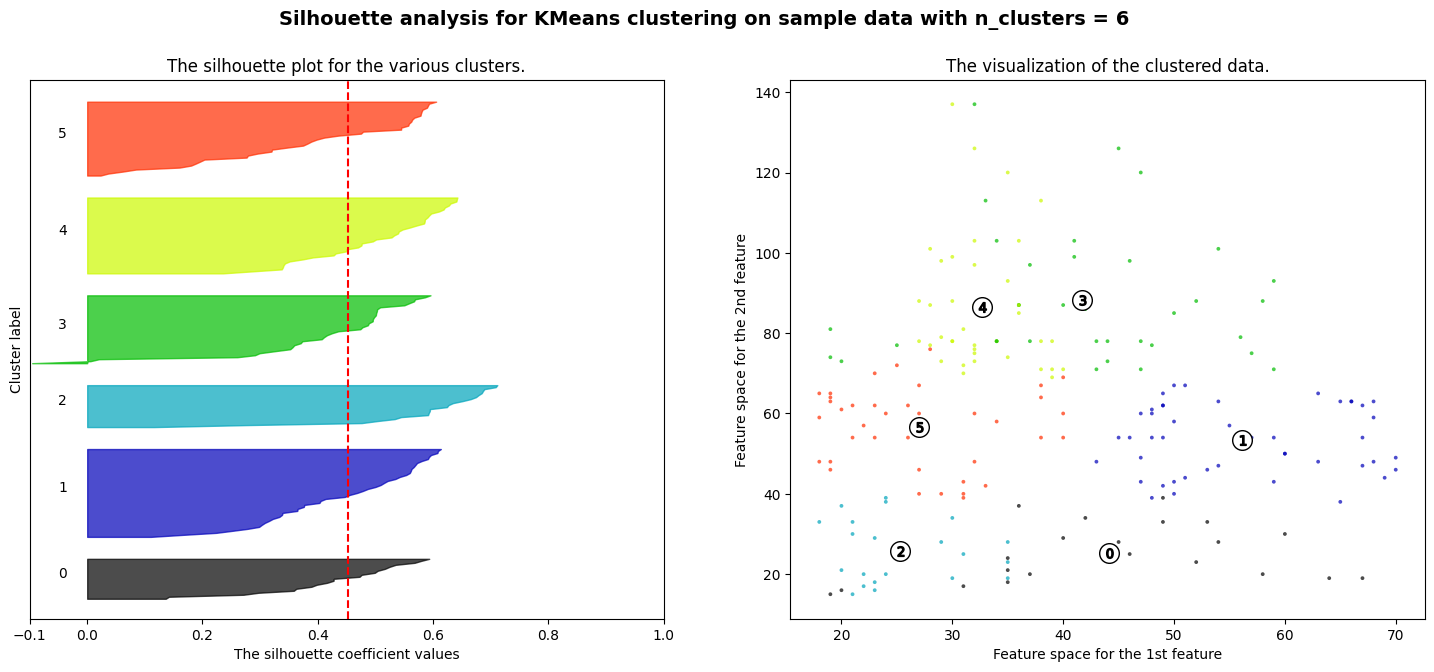

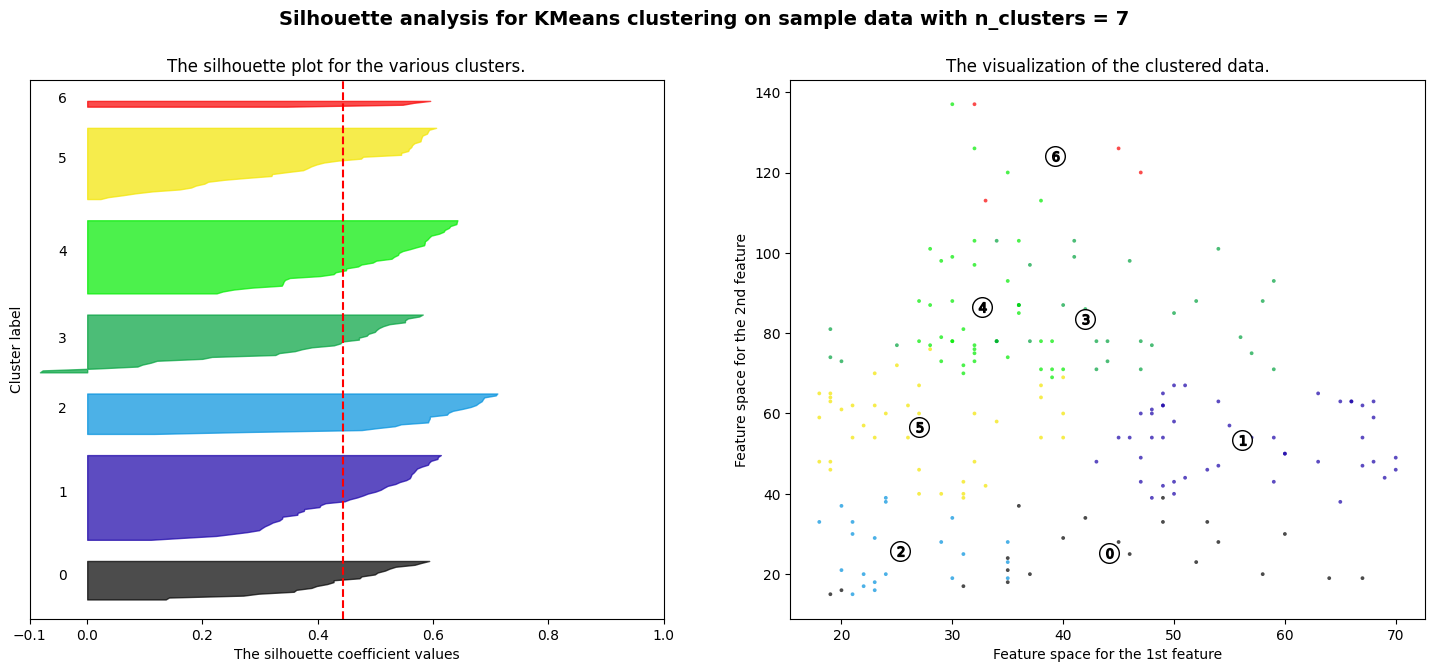

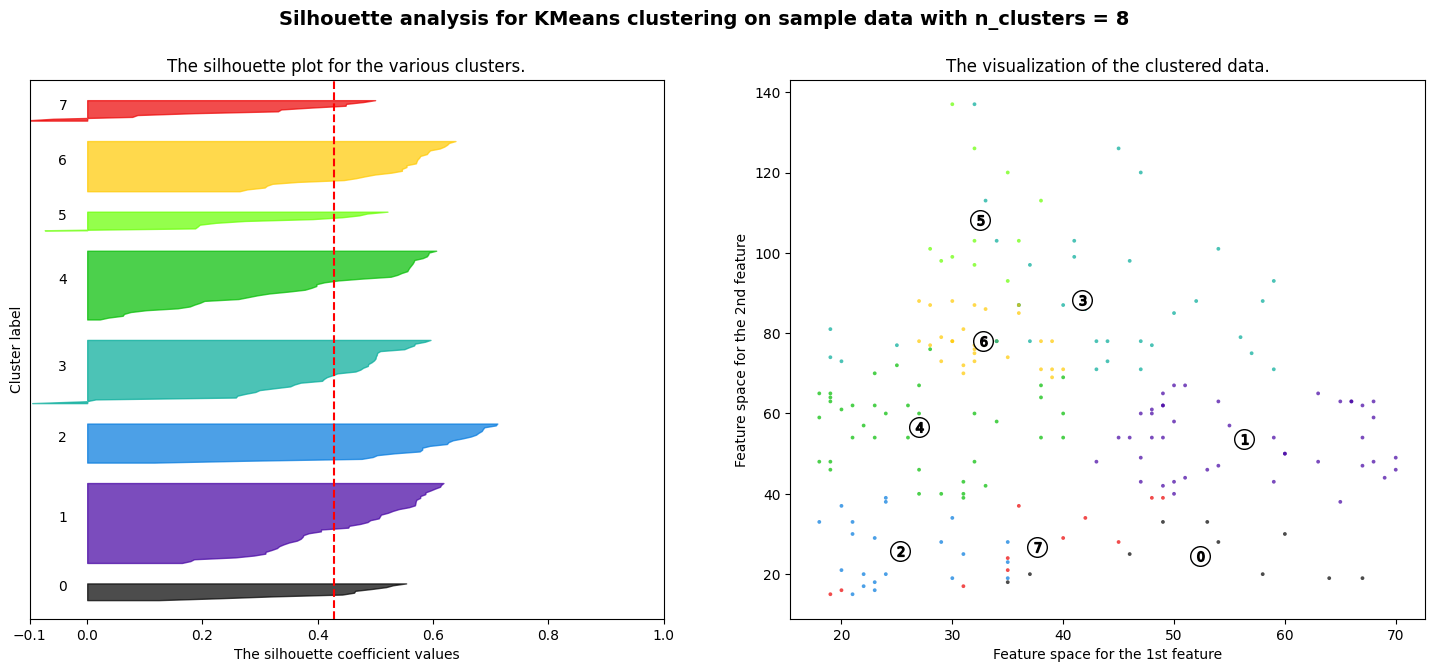

In [67]:
from sklearn.metrics import silhouette_samples, silhouette_score

#clutering with age, income and score
X = df.loc[:,[Age, Income, Score]].values

range_n_clusters = [3, 4, 5, 6,7,8]

# iterate to compute silhouette coefficient
for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The silhouette plot
    # The silhouette coefficient can range from -1, 1
    ax1.set_xlim([-0.1, 1])

    # add blank space between silhouette plots for clear visualization
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # set a seed of 100 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=100)
    cluster_labels = clusterer.fit_predict(X)


    # compute the average silhouette coefficient for all the samples.
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # right plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # draw a centroid at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

Similar to an elbow plot, k=6 seems to be a reasonalble choise.